# Themenprojekt Modul Kryptologie FS20 Tobias Bossert
Im ersten Teil dieses Dokuments werden die verschieden Betreibs-Modi aufgelistet und verglichen, im zweiten Teil werfen wir einen vertiefteren Blick auf den ECB Modus mithilfe eine aktuellen Beispiels. Im dritten Teil ist der Code für die Demonstration am Beispiel des berühmten TUX-Pinguins zu finden.

# Die Betriebsmodi in Feistel- und SPN's, AES
Da AES eine Blockchiffre ist, müssen die Klartexte jeweils eine fixe länge von $n$ bits haben. Wolle wir nun einen Klartext $m_1...m_n$ zum Cryptotext $c_1...c_m$ verschlüsseln und dieser ist länger als die Blocklänge $n$ ist, muss die Blockchiffre wiederholt angewendet werden. Um den Klartext entsprechend aufzuteilen und Blockweise zu verschlüssen gibt es die Verschiedenen Betreibsmodi.

## ECB-Modus (Electronic Codebook)
Hier wird jeder Block unabhängig von den anderen verschlüsselt. Damit ergeben sich folgenden Verschlüsselungs- / Entschlüsselungs Funktionen:

Verschlüsselung: $c_i = e_k(m_i)$

Entschlüsselung: $m_i = d_k(c_i)$

Wobei für jeden Block den selben Schlüssel $K$ verwendet wird. Dies ist der naivste aber auch einfachste Betriebsmodus und bringt entsprechend Probleme mit sich:

- Die zu verschlüsselnden Daten dürfen keine Regelmässigkeiten aufweisen da diese Muster dann auch unweigerlich in Kryptotext zu sehen sind. Dieser Betriebsmodus ist also für sog. "low entropy data" tabu!
- Die Wahl des Blockverschlüsselungsverfahren ist dabei irrelevant!

Einen Pluspunkt erhält dieser Modus aber dann doch: Da die Blöck unabhängig von einander verschlüsselt werden, gibt es keine Fehlerfortpflanzung und zudem müssen die Blöcke auch nicht in der gleichen Reihenfolge wie bei der Verschlüsselung entschlüsselt werden. 


## CBC-Modus (Cipher Block Chaining)
Im unterschied zum ECB-Modus verwenden die beiden folgenden Betriebsmodi beide Blockverkettung. Die Idee dahinter ist der block $c_i$ jeweils vom vorherigen Block $c_{i-1}$ abhängt. Dabei wird der vorherige Block jeweils mit einem $xor$ vor der Verschlüsselung vereint. Damit dies auch mit dem ersten Block funktioniert muss noch ein initialisieren Vektor $IV$ als Parameter definiert werden.
Es wird also davon ausgegangen, dass der vorherige Block _zufällig_ genug ist, um eine Ausreichende Durchmischung (Diffusion) zu erhalten. Folgend wieder die Verschlüsselungs- / Entschlüsselungs Funktionen:

Verschlüsselung (1 Block): $c_0 = e_k(m_0 \oplus IV)$

Verschlüsselung (i-ter Block): $c_i = e_k(m_0 \oplus c_{i-1})$

Entschlüsselung: $m_i = d_k(c_i)\oplus c_{i-1}$

Der Resultierende Kryptotext scheint also viel _zufälliger_ also noch mit dem ECB-Modus. Durch die Verwendung der Blockverkettung eignet der CBC-Modus auch als MAC (message authentication code) da eine Änderung in einem Block alle nachfolgenden Blöcke verändern muss und dadurch auch die kleinste Änderung erwartungsgemäss einen grossen Effekt auf den Kryptotext haben muss. Dieser Vorteil ist aber je nach Anwendung ein Nachteil die beim ECB Modus fehlende Fehlerfortpflanzung kann hier zum Problem werden.

## CTR-Modus (Counter)
Mit dieser Betriebsart können Blockchiffren als Stromchriffren verwendet werden. Um dies zu erreichen wird zuerst ein zufälliger Initialisiertungs Vektor (nouce) mit einem Counter $ctr$ zu deinem Bitstring $T$ der länge $m$ gebildet wobei der Counter bei jedem Block um eins inkrementiert wird. Einen wesentlichen Unterschied zu den vorherigen Modies ist die Tatsache, dass hier nicht der Klartext selbst sondern der jeweilige Initialisierungsvektor verschlüsselt wird. Der Klartext wird anschliessend mit dem Output mittels $xor$ kombiniert und man erhält den Kryptotext $c_i$. Dies ergibt wieder die folgenden Verschlüsselungs- / Entschlüsselungs Funktionen:

Verschlüsselung : $c_i = e_k(T_i) \oplus m_i$

Entschlüsselung: $m_i = e_k(T_i) \oplus c_i$

Nebst der möglichen Verwendung als Stromchiffre ergeben sich durch diesen Modus noch andere Vorteile:
- Da die Verschlüsselung/Entschlüsselung identisch. Es braucht also nur eine Implementation.
- Der Schlüsselstrom kann im voraus berechnet werden.
- Da die die Geheimtext-Blöcke von einander unabhängig sind kann die Verschlüsselung auch parallelisiert stattfinden.


## CFB-Modus (Cipher Feedback Mode)
Mit dieser Betriebsart können Blockchiffren ebenfalls als Stromchiffren verwendet werden. Wie auch beim CBC Modus dient der Inititialisierungs Vektor $IV$ als Startwert welche mithilfe des Keys $K$ verschlüsselt wird und am Schluss mit dem Plaintext $m_o$ mittels $xor$ kombiniert wird. Im Unterschied zum CTR Modus, wird ab dem zweiten Block der Kryptotext $c_{i-1}$ an Stelle des $IV$ genommen. Dieses vorgehen ergibt folgende rekursive Mathematische Definition:

Verschlüsselung (1 Block): $c_0 = m_0 \oplus e_k( IV)$

Verschlüsselung (i-ter Block): $c_i = m_i \oplus  e_k(c_{i-1})$

Entschlüsselung: (1 Block): $m_0 = p_0 \oplus d_k( IV)$

Entschlüsselung: (i-ter Block): $m_i = p_i \oplus  d_k(m_{i-1})$

Ein wesentlicher Vorteil dieses Modus ist die Selbstsynchronisation: Dass heisst, der Empfänger muss den inneren Zustand des Sender nicht kennen. Ist zum Beispiel $IV$ beim Empfänger nicht bekannt, kann ab dem zweiten Block trotzdem entschlüsselt werden. Bei anderen Betriebsarten (zum Beispiel CBC Modus) ist dies nicht möglich da jeder Block schlussendlich von $IV$ Abhängt!

## Weitere Betriebsmodi
- OFB-Modus (output feedback mode), auch als Stromchiffren Modus einsetzbar
- CCM-Mode (counter with cipher-block chaining mode)

# Aktuelles Beispiel: Zoom
Der Meeting Dienst "Zoom" ist sicher allen ein Begriff und gemäss einer Analyse von [https://www.datanyze.com](https://www.datanyze.com/market-share/web-conferencing--52) ist er mit 36.51% Marktanteil der am meisten benutze Web Conferencing Service. Auf deren Website findet sich das [Zoom Encryption Whitepaper](https://zoom.us/docs/doc/Zoom%20Encryption%20Whitepaper.pdf) (Im April 2020 aktualisiert) und darin findet man unter anderem folgende zwei Aussagen: 

>Our Zoom Phone product uses Secure Real-time Transport Protocol leveraging AES-128-ECB to encrypt and protect phone conversations in transit to and from our data cente.  

>[...]Zoom will send and receive meeting real-time content (video, voice, and content share) via User Datagram Protocol (UDP), directly from the meeting server encrypted with AES-256 ECB

Wie man sehen kann, wird ECB für hoch sensitive Daten verwendet. Um das Ausmass dieses "Design-Entscheides" aufzuzeigen eine kleine Geschichte:

Eine Person der Hackgruppe h4xX0r's hat den ganz grossen Coup gelandet - ihm ist es gelungen endlich die NSA zu hacken. Natürlich will er das seinen Hackerkollegen mitteilen und was ist da geeigneter als eine kleine Powerpoint Präsentation (der Inhalt ist natürlich geheim, daher kann sie hier auch nicht gezeigt werden). Er schaut sich auf Google um einen passenden "Web Conferencing Service" zu finden. Schlussendlich findet er eine Firma welche transparent genug ist und ihre Verschlüsselungs-Verfahren in einem Whitepaper stolz präsentiert. Das 3 Seitige PDF beginnt mit diesem Satz (kein Witz!):

>the goal of our encryption design is to provide the maximum amount of privacy possible while supporting the diverse needs of our client base.

Diesen Satz überzeugt ihn, es ist ja schliesslich "the maximum amount of privacy possible". Da er Meeting Name schon "NSA" eingegeben hat und noch nie etwas von Op-Sec gehört hat, werden alle abgehenden Verbindungen von seinem Computer sowieso schon überwacht. Er beginnt mit der Übertragung der ersten Slide:

![](img/top_secret.bmp_enc.bmp)

Nachdem sich seine Kollegen wieder etwas erholt haben die zweite Slide:

![](img/top_secret2.bmp_enc.bmp)

Zur dritten Slide ist es leider nie gekommen - es weiss auch niemand genau warum...

# Code Beispiel
Der folgende Code kann folgendermassen ausgeführt werden:

- Python >= 3.6 muss installiert sein
- Repo [sirtoobii/cry_project](https://github.com/sirtoobii/cry_project) clonen
- In erstelltes Verzeichnis navigieren
- Virtual Env erstellen mit `python3.6 -m venv venv`
- Virtual Env aktivieren (Linux) `source venv/bin/activate` (Windows) `venv/Scripts/activate`
- Dependencies installieren: `pip install -r requirements.txt`
- Notebook Server starten: `jupyter notebook`
- Einzelne Zellen können mit [Shift+Enter] ausgeführt werden
- Am Schluss kann der Ornder einfach gelöscht werden und alles (inkl. Dependencies) ist wieder weg

In [1]:
from typing import Union
from Crypto.Cipher import AES
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def encrypt_image(bmp_image, encryptor, ret_array=False) -> Union[None,np.ndarray]:
    """
    Takes a BMP image and encrypts the data part using the `encryptor` object.
    
    :param bmp_image: Path to BMP image
    :param encryptor: A valid pycryptodome encrpytor object
    :param ret_array: Should we return an array with the image data too.
    :return: A image is stored to the same location with the suffix `_emp.bmp`
    """
    # import original image
    with open(bmp_image, 'rb') as f:
        image_data = f.read()
    img_array = bytearray(image_data)
    
    # extract BMP headers
    # BMP-Spec: https://de.wikipedia.org/wiki/Windows_Bitmap#Informationsblock
    bmp_header = bytes(img_array[0:14])
    bmp_dibheader = bytes(img_array[14:124])
    bmp_data = bytes(img_array[124:])
    
    # pad data length to multiple of 16
    bmp_data += b' '*(16 - len(bmp_data)%16)
    
    crypto_text = encryptor.encrypt(bmp_data)
    
    # write output file
    with open(bmp_image + "_enc.bmp", 'wb') as o:
        o.write(bmp_header+bmp_dibheader+crypto_text)
    
    if ret_array:
        return plt.imread(bmp_image + "_enc.bmp")

In [86]:
# depending if we want to use AES-128, AES-192 or AES-256 
# the key has to be exactly 16, 24 or 32 bytes long
key = b'supersecurekey01'

In [87]:
# init encryptors
encryptor_ecb = AES.new(key, AES.MODE_ECB)
encryptor_cbc = AES.new(key, AES.MODE_CBC) #IV is generated automatically

In [89]:
img_ecb = encrypt_image("img/Tux-orig.bmp", encryptor_ecb, ret_array=True)
img_cbc = encrypt_image("img/Tux-orig.bmp", encryptor_cbc, ret_array=True)

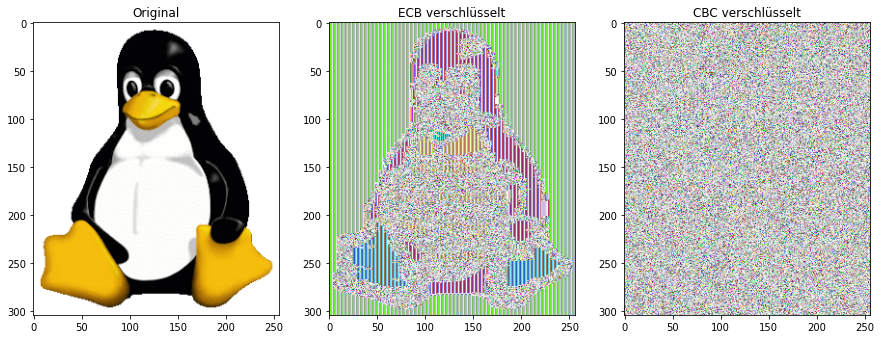

In [90]:
fig, ax = plt.subplots(ncols=3, figsize=(15,6))
_ = ax[0].imshow(plt.imread("img/Tux-orig.bmp"))
_ = ax[0].set_title("Original")
_ = ax[1].imshow(img_ecb)
_ = ax[1].set_title("ECB verschlüsselt")
_ = ax[2].imshow(img_cbc)
_ = ax[2].set_title("CBC verschlüsselt")

# Quellen
- Sourcecode: Tobias Bossert
- Tux-Bild: lewing@isc.tamu.edu Larry Ewing, The GIMP
- Slides: Tobias Bossert
- Theorie: Folien Andreas Leiser FHNW, Diplomarbeit Elmar Wolfgang Tischhauser "T-Funktionsbasierte Blockchiffren", Technische Universität Darmstadt, Wikipedia https://en.wikipedia.org/wiki/Block_cipher_mode_of_operation